In [1]:
############################################
#数値微分、gradientの練習
############################################

次の関数の数値微分をしてみる。

$$
    y = 0.01x^2 + 0.1x
$$

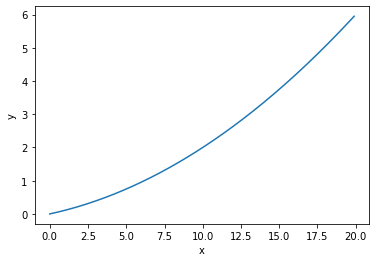

In [2]:
import numpy as np
import matplotlib.pylab as plt

def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x #ブロードキャストを頭で動かしてみるとよく理解できる

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x,y)
plt.show()


次に、この関数を微分するための関数を定義する
$$
    f(x)' = \frac {f(x+h)-f(x-h)}{2h}
$$

In [3]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h))/(2*h) 

In [4]:
#実際に数値微分してみる。

print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))


0.1999999999990898
0.2999999999986347


In [5]:
#function_1に対して、接線を引いてみる
#x1における接線の関数を返す関数
#y = f(x1)' (x-x1) + f(x1)
def tangent_line2(f, x):
    b = f(x) #切片
    a = numerical_diff(f, x) #傾き
    c = -a*x
    return lambda t: t*a + c + b

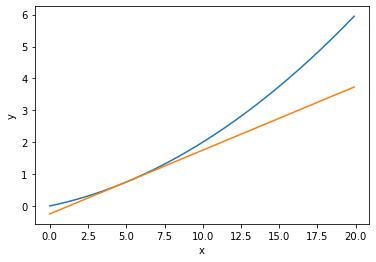

In [6]:
#接線引いてみる
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("y")

y2 = tangent_line2(function_1, 5)(x) #x = 5における接線

plt.plot(x,y)
plt.plot(x,y2)

plt.show()



<IPython.core.display.Javascript object>


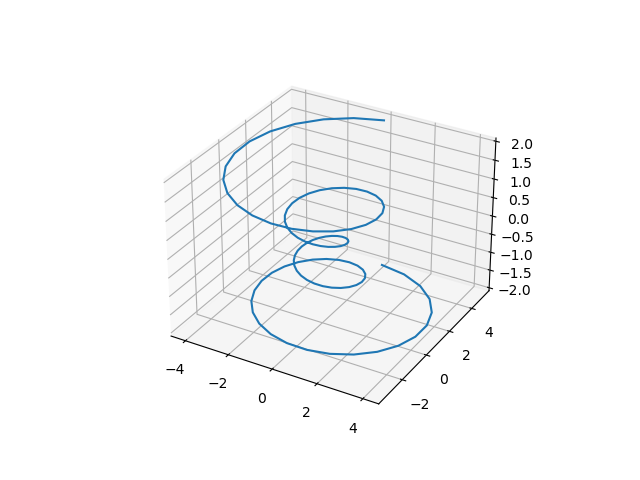

In [7]:
#テキスト4.3.3の偏微分にある関数グラフを表示したいが、テキスト付属のソースは無いみたい。
#なので、自力でやってみる。
#試しに、以下のコードを実行する。描画したグラフをグリグリ動かせるので、関数形状の把握に役に立つ
#以下から持ってきた。
#https://qiita.com/alchemist/items/8b5984393e9b4855a18c

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    # <- 明示的には使わないが、インポートしておく必要がある。
# Notebook出力には次の１行が必要（%matplotlib inlineだとグラフを回転できない）
%matplotlib notebook

import numpy as np
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

fig = plt.figure()
ax = fig.gca(projection='3d')    # <- axes3dをインポートしていないとエラーになる。
ax.plot(x, y, z)
plt.show()

<IPython.core.display.Javascript object>


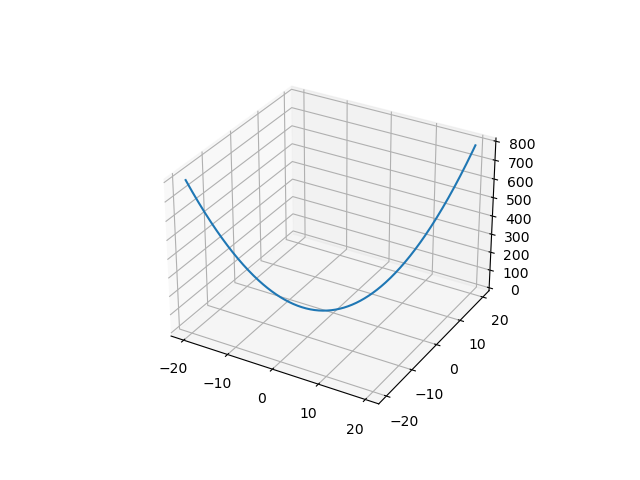

In [8]:
#キモはplot関数にz軸を与えるだけで、良さそうだ。。。
#行ってみよう！

def function_2(x,y):
    return x**2 + y**2

x = np.arange(-20.0, 20.0, 0.1)
y = np.arange(-20.0, 20.0, 0.1)
z = function_2(x, y)

fig = plt.figure()
ax = fig.gca(projection='3d')    # <- axes3dをインポートしていないとエラーになる。
ax.plot(x,y,z)
plt.show()


<IPython.core.display.Javascript object>


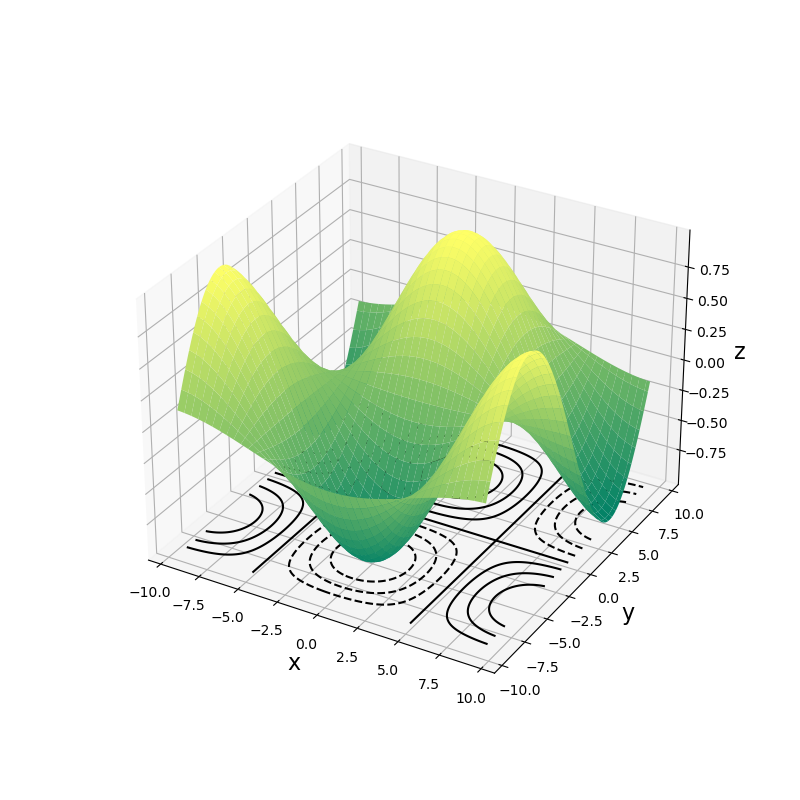

In [9]:
#もっと点を増やす（メッシュ状にやるにはこうなる）
#ここにお世話になった
#https://python.atelierkobato.com/axes3d/

#まずはサンプルを描画してみる！

# PYTHON_MATPLOTLIB_3D_PLOT_03

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Figureと3DAxeS
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection="3d")

# 軸ラベルを設定
ax.set_xlabel("x", size = 16)
ax.set_ylabel("y", size = 16)
ax.set_zlabel("z", size = 16)

# 円周率の定義
pi = np.pi

# (x,y)データを作成
x = np.linspace(-3*pi, 3*pi, 256)
y = np.linspace(-3*pi, 3*pi, 256)

# 格子点を作成
X, Y = np.meshgrid(x, y)

# 高度の計算式
Z = np.cos(X/pi) * np.sin(Y/pi)

# 曲面を描画
ax.plot_surface(X, Y, Z, cmap = "summer")

# 底面に等高線を描画
ax.contour(X, Y, Z, colors = "black", offset = -1)

plt.show()

<IPython.core.display.Javascript object>


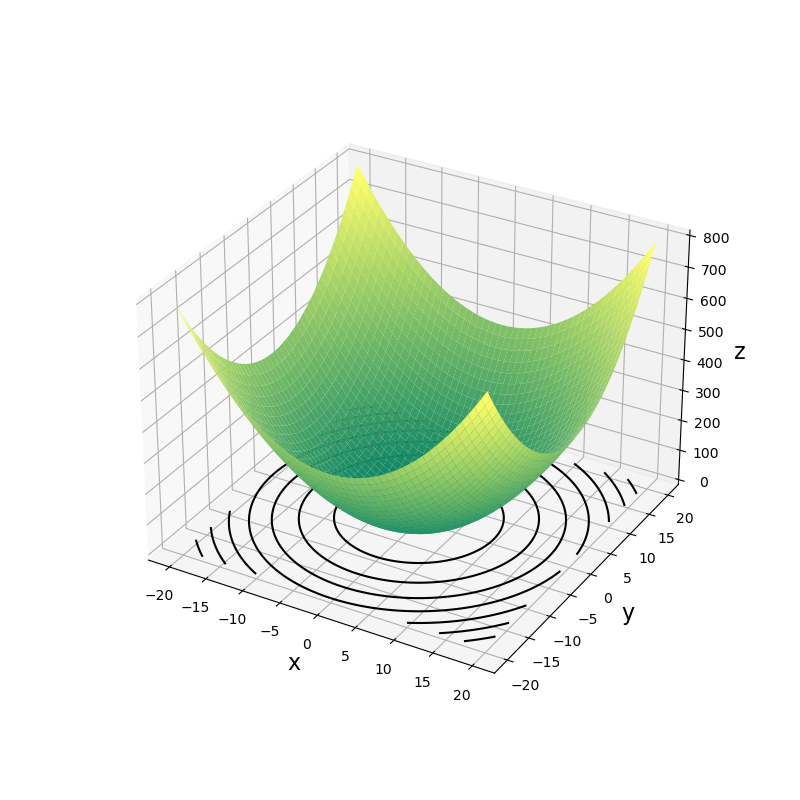

In [10]:
#次にfunction_2を描画してみる。結果は素晴らしい出来になる！
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Figureと3DAxeS
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection="3d")

# 軸ラベルを設定
ax.set_xlabel("x", size = 16)
ax.set_ylabel("y", size = 16)
ax.set_zlabel("z", size = 16)

x = np.arange(-20.0, 20.0, 0.1)
y = np.arange(-20.0, 20.0, 0.1)

# 格子点を作成 ★これがキモ！
X, Y = np.meshgrid(x, y)

# 高度の計算式
Z = function_2(X, Y)

# 曲面を描画
ax.plot_surface(X, Y, Z, cmap = "summer")

# 底面に等高線を描画
ax.contour(X, Y, Z, colors = "black", offset = -1)

plt.show()

In [17]:
##############################################
#グラフ遊びはとりあえず、終わり。
#次に、gradientを数値的に求める関数をつくる
##############################################

#微分なんて、ちょっと動かした場合の変化量を求めるもの。
#gradientはfに対するすべてのxの要素について数値微分を求めたものだと考えれば良い。

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # xと同じ形状の要素が0の配列を生成
    
    for idx in range(x.size):
        #x[idx]に関する微分を繰り返していく。
        
        temp = x[idx] # xを一旦退避しておく
        
        #以下の部分からx[idx]に関するnumerical_diffを実行する
        # x[idx]を少し+hだけ動かす
        x[idx] = temp + h 
        upper = f(x)
        # x[idx]を少し-hだけ動かす
        x[idx] = temp - h 
        lower  = f(x)
        ####################################################
        
        #傾きを計算する
        grad[idx] = (upper-lower)/(2*h)
        
        #最後にtempを戻しておく
        x[idx] = temp
        
        
    return grad
    
#動きを試す
#題材として先ほどのfunction_2をnumpyで扱いやすいように、引数を配列で受け取るように、再定義する。

def function_2(x):
    return np.sum(x**2) #ブロードキャストを利用する

print(function_2(np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([3.0, 4.0])))

25.0
[6. 8.]


<IPython.core.display.Javascript object>


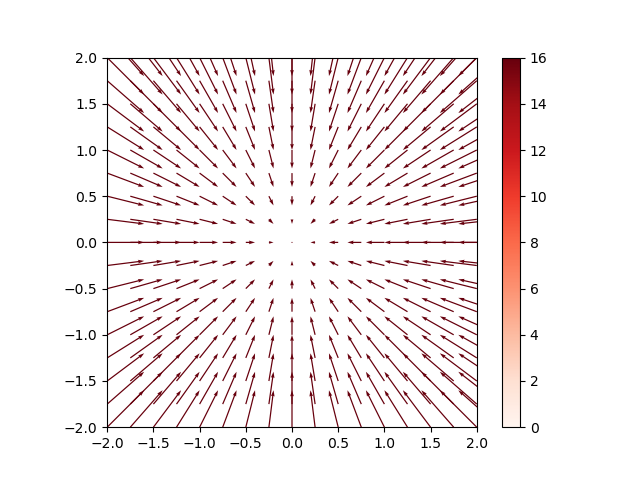

In [40]:
###############################
# P105のメッシュ、傾きを描画する
###############################

#gradient_2d.pyで実行している処理（グラフ描画部）がわからないので、超力技でやったらどうなるかを確認していく

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)

px=[]
py=[]
vx=[]
vy=[]
colors=[]

#よくわからないので、とりあえず、力技
for x_0 in x0:
    for x_1 in x1:
        grad = numerical_gradient(function_2, np.array([x_0,x_1]))
        #得たgradは向きとして使えるが、向きは逆転させておく
        grad = -grad
        px.append(x_0)
        py.append(x_1)
        vx.append(grad[0]*0.1) # 見やすさのため、ベクトルの大きさを0.1しておく
        vy.append(grad[1]*0.1) # 同上
        colors.append(16)
        #colors.append((x_0**2+x_1**2)**1.5)
        
fig = plt.figure()
plt.gca().set_aspect('equal')
im = plt.quiver(px,py,vx,vy,colors, cmap='Reds', scale = 1,scale_units='xy')
plt.xlim(-2.0,2.0)
plt.ylim(-2.0,2.0)
fig.colorbar(im)
im.set_clim(0,16)
plt.show()

#とりあえず、自力で描画できた。

#次に、gradient_2d.pyで実行している処理（グラフ描画部）がわからないので、ステップを踏んでいく。
#多分、こちらのほうが、上記の超力技よりもエクセレントなんだろう。

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

#これを見ると、格子状にデータを作っているに過ぎないことがわかる
#print(X)
#print(X.shape)

#gradient_2d.pyではX,Yをflattenしたうえで、いろいろと転置したり計算しているようである・・・なぜか？

X = X.flatten()
Y = Y.flatten()

#多分、ノートに書いて理解はできそうだが。。。

<IPython.core.display.Javascript object>


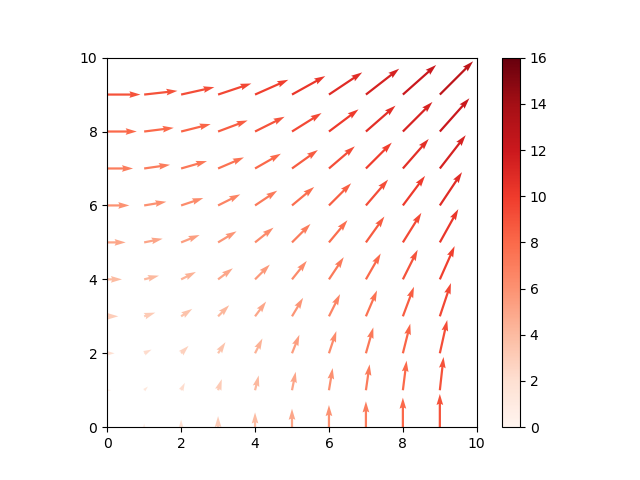

In [31]:
#参考。
#quiverのサンプル
#https://phst.hateblo.jp/entry/2020/12/22/000000
import matplotlib.pyplot as plt

px=[]
py=[]
vx=[]
vy=[]
colors=[]

for yi in range(10):
    for xi in range(10):
        px.append(xi)
        py.append(yi)
        vx.append(yi*0.1)
        vy.append(xi*0.1)
        colors.append((xi**2+yi**2)**0.5)

fig = plt.figure()
plt.gca().set_aspect('equal')
im = plt.quiver(px,py,vx,vy,colors, cmap='Reds', scale = 1,scale_units='xy')
plt.xlim(0,10)
plt.ylim(0,10)
fig.colorbar(im)
im.set_clim(0,16)
#plt.savefig("save.pdf")
plt.show()